# Multiple Linear Regression

### A Bike-Sharing System - BoomBikes

## Step 1: Reading and Understanding the Data

In [1]:
#Import the required libraries and supress warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#Import the Dataset

bikes_df = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows

bikes_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Checking the Data

bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking the description of the dataset

bikes_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
#checking the shape of the dataset 

bikes_df.shape

(730, 16)

## Step 2: Visualising the Data

<Figure size 864x432 with 0 Axes>

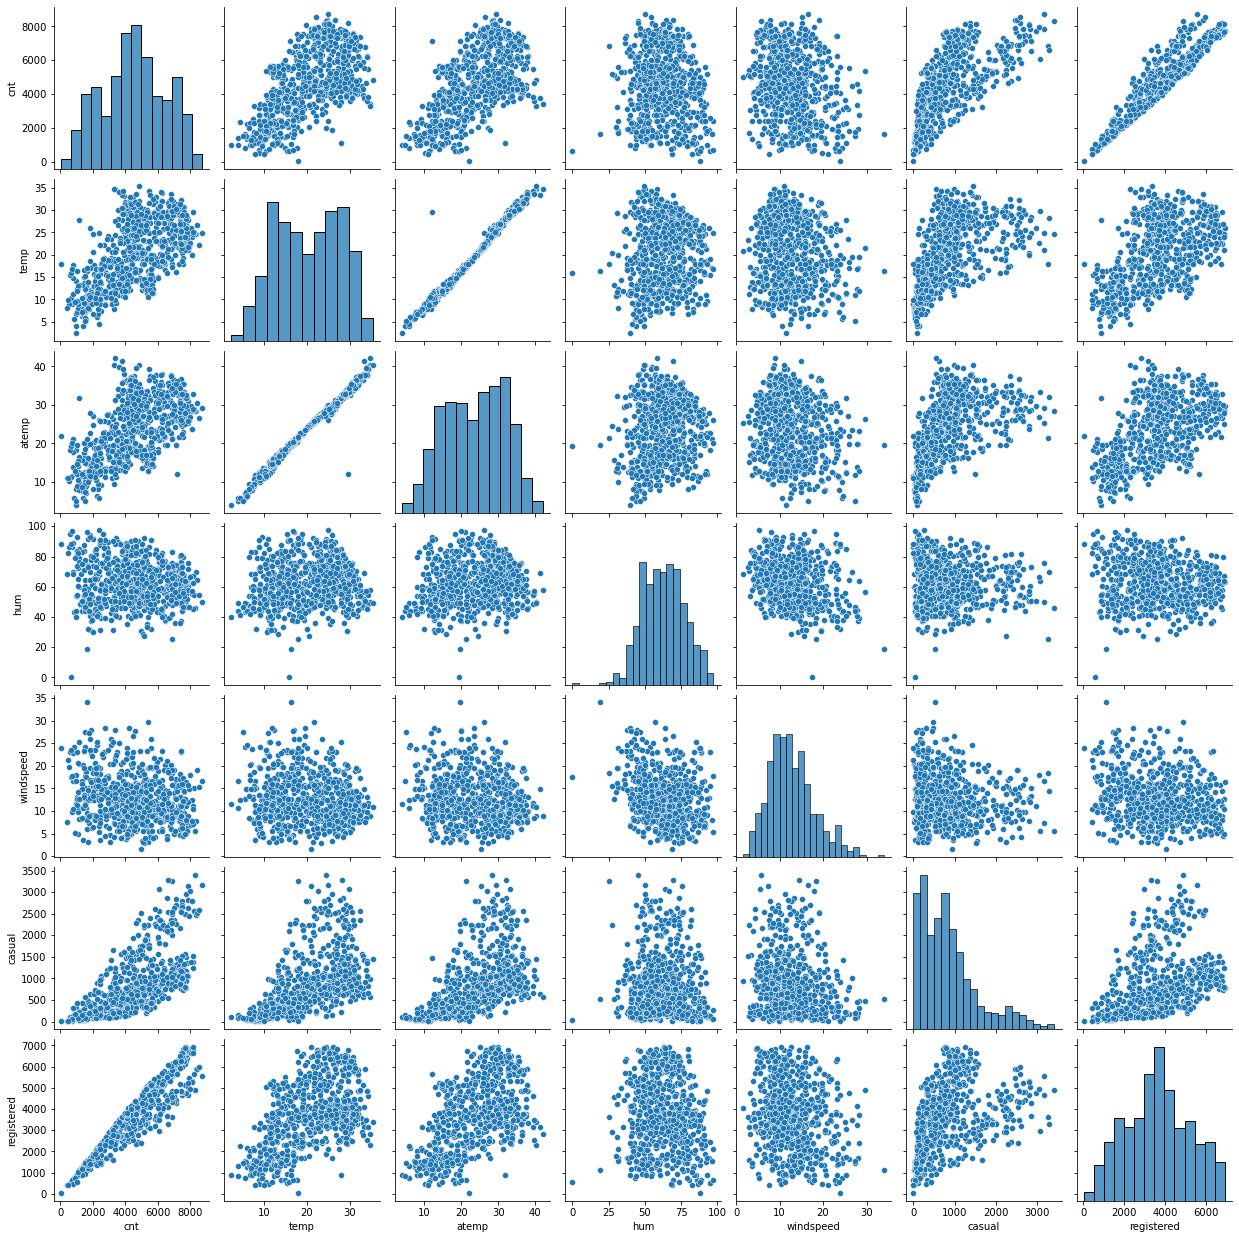

In [7]:
#Plotting a pairplot for numeric variables

plt.figure(figsize=(12,6))
sns.pairplot(bikes_df,vars=['cnt','temp','atemp','hum','windspeed','casual','registered',])
plt.show()

In [8]:
temp_df = bikes_df.copy(deep=False)

In [9]:
temp_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
# Categorical columns are mapped with their sub-categories

temp_df['season']=temp_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
temp_df['mnth']=temp_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
temp_df['weathersit']=temp_df.weathersit.map({1: 'Clear',2:'Misty',3:'Light Snow',4:'Heavy Rain'})
temp_df['holiday']=temp_df.holiday.map({1: 'non-holiday', 0: 'holiday'})
temp_df['workingday']=temp_df.workingday.map({1: 'working day', 0: 'holiday'})
temp_df['weekday']=temp_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

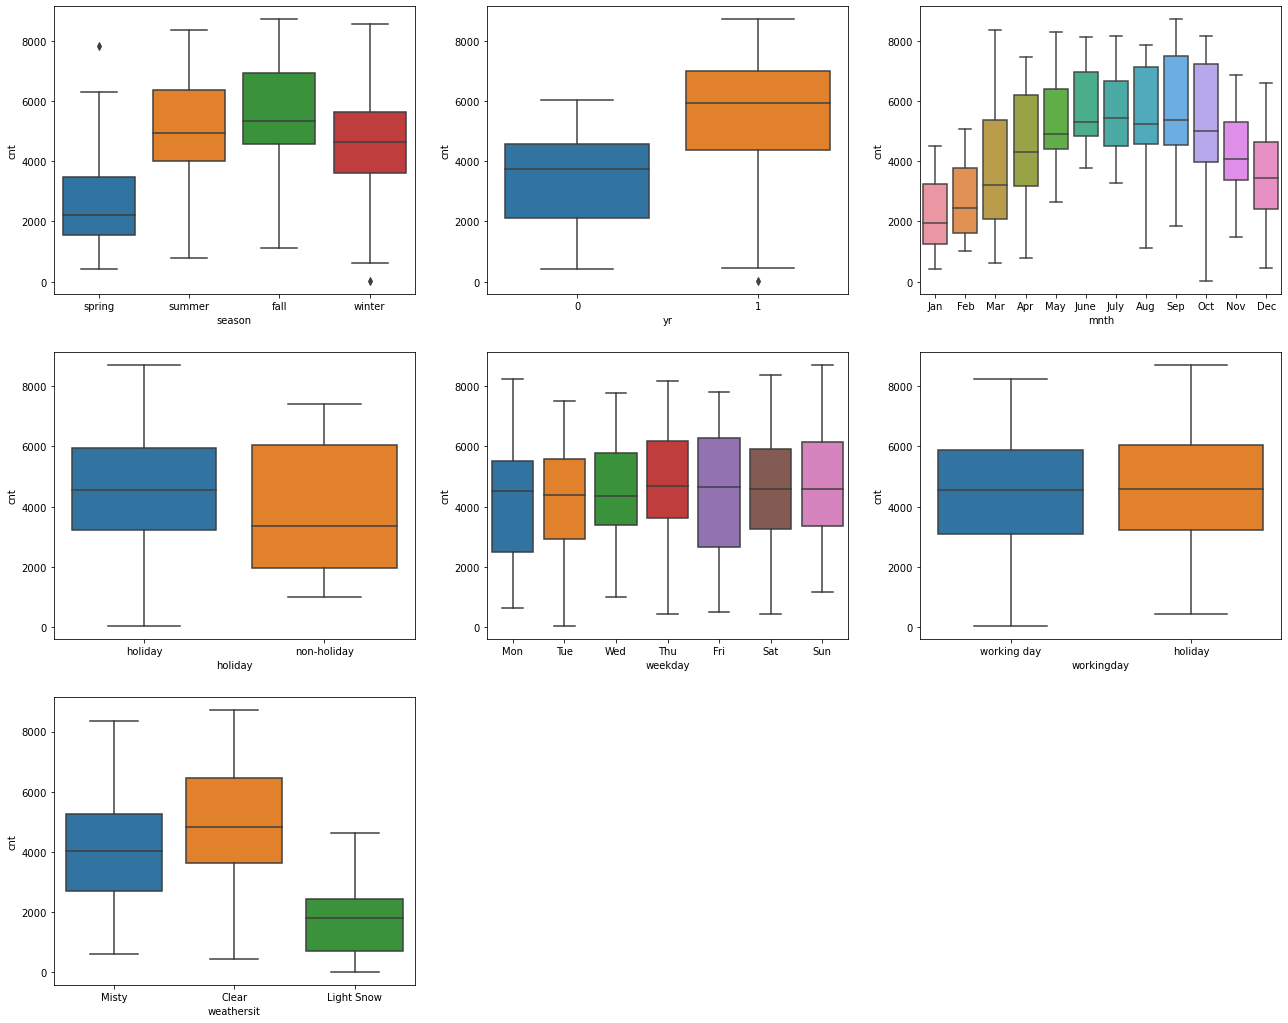

In [11]:
#Categorical columns are visualized using a box-plot

plt.figure(figsize=(22,18))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=temp_df)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=temp_df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=temp_df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=temp_df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=temp_df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=temp_df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=temp_df)

plt.show()

#### Observations from box-plot

1) There are more customers renting bikes on a clear day when compared to misty or when there is snow.

2) Average bikes rented on a holiday is more when compared to non-holiday.

3) More Bikes were rented in 2019 when compared to 2018

4) Highest number of bikes were rented in Summer and Fall

5) Bike rentals are high in the month of Aug, Sep and Oct.

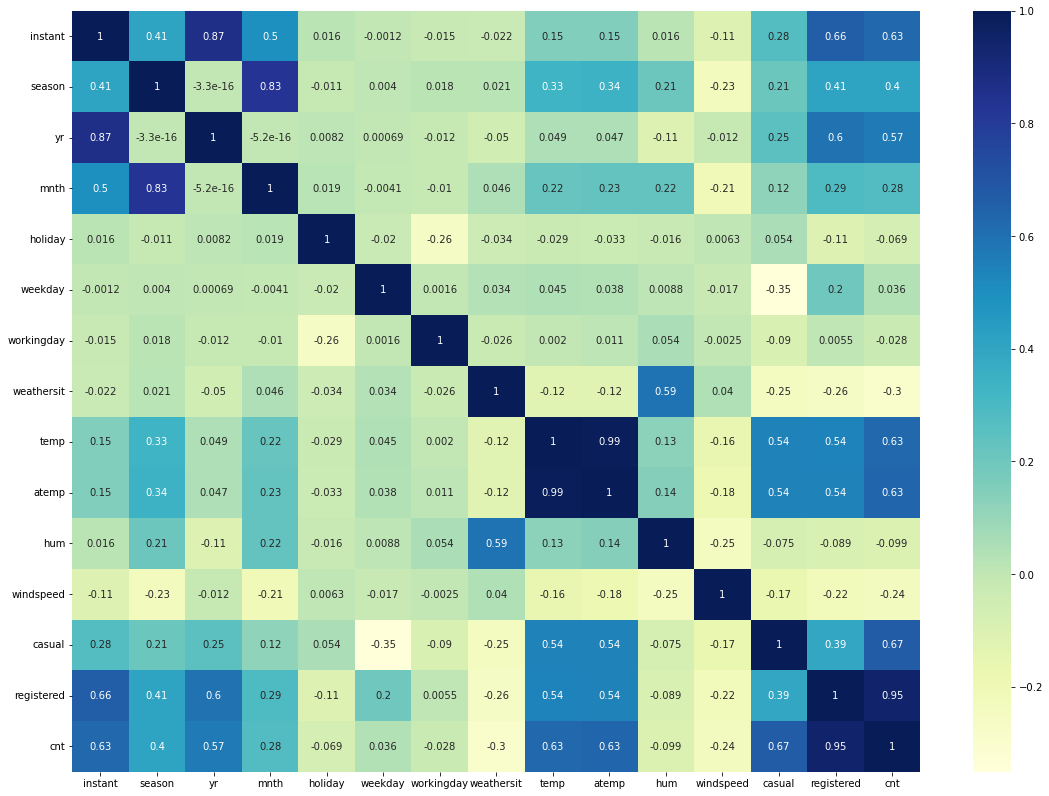

In [12]:
#Plotting a heat-map to understand the correlation between variables

plt.figure(figsize=[19,14])
sns.heatmap(bikes_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [13]:
#Drop the columns which are not required for the analysis

bikes_df.drop(['instant','dteday'],inplace=True,axis=1)

In [14]:
bikes_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

## Step 3: Data Preparation

In [15]:
# Mapping the season column with their sub-categories and creating the dummy variables

bikes_df['season']=bikes_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

status = pd.get_dummies(bikes_df['season'],drop_first=True)

status.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [16]:
# merging the dummy variables with the original dataframe

bikes_df = pd.concat([bikes_df,status],axis=1)

bikes_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0

In [17]:
# Mapping the Month column with their sub-categories and creating the dummy variables

bikes_df['mnth']=bikes_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

m_status = pd.get_dummies(bikes_df['mnth'],drop_first=True)

m_status.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0     0    0    0    0    0    0
1    0    0    0    1     0     0    0    0    0    0    0
2    0    0    0    1     0     0    0    0    0    0    0
3    0    0    0    1     0     0    0    0    0    0    0
4    0    0    0    1     0     0    0    0    0    0    0

In [18]:
# merging the dummy variables with the original dataframe

bikes_df = pd.concat([bikes_df,m_status],axis=1)

bikes_df.head()

season  yr mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0        1           1           2  14.110847   
1  spring   0  Jan        0        2           1           2  14.902598   
2  spring   0  Jan        0        3           1           1   8.050924   
3  spring   0  Jan        0        4           1           1   8.200000   
4  spring   0  Jan        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0       0    0    0    0    1     0     0    0    0    0    0    0  
1       0    0    0    0    1     0     0    0    0    0    0    0  
2       0    0    0    0    1     0     0    0    0    0    0    0  
3       0    0    0    0    1     0     0    0    0    0    0    0  
4       0    0    0    0    1     0     0    0    0    0    0    0

In [19]:
# Mapping the weekday column with their sub-categories and creating the dummy variables

bikes_df['weekday']=bikes_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

w_status = pd.get_dummies(bikes_df['weekday'],drop_first=True)

w_status.head()

Mon  Sat  Sun  Thu  Tue  Wed
0    1    0    0    0    0    0
1    0    0    0    0    1    0
2    0    0    0    0    0    1
3    0    0    0    1    0    0
4    0    0    0    0    0    0

In [20]:
# merging the dummy variables with the original dataframe

bikes_df = pd.concat([bikes_df,w_status],axis=1)

bikes_df.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1           2  14.110847   
1  spring   0  Jan        0     Tue           1           2  14.902598   
2  spring   0  Jan        0     Wed           1           1   8.050924   
3  spring   0  Jan        0     Thu           1           1   8.200000   
4  spring   0  Jan        0     Fri           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  Mon  Sat  \
0       0    0    0    0    1     0     0    0    0    0    0    0    1    0   
1       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
2       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
3       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
4       0    0    0    0    1     0     0    0    0    0    0    0    0    0   

   Sun  Thu  Tue  Wed  
0    0    0    0    0  
1    0    0    1    0  
2    0    0    0    1  
3    0    1    0    0  
4    0    0    0    0

In [21]:
# Mapping the weathersit column with their sub-categories and creating the dummy variables

bikes_df['weathersit']=bikes_df.weathersit.map({1: 'Clear',2:'Misty',3:'Light Snow',4:'Heavy Rain'})

ws_status = pd.get_dummies(bikes_df['weathersit'], drop_first=True)

ws_status.head()

Light Snow  Misty
0           0      1
1           0      1
2           0      0
3           0      0
4           0      0

In [22]:
# merging the dummy variables with the original dataframe

bikes_df = pd.concat([bikes_df,ws_status],axis=1)

bikes_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     Mon           1      Misty  14.110847   
1  spring   0  Jan        0     Tue           1      Misty  14.902598   
2  spring   0  Jan        0     Wed           1      Clear   8.050924   
3  spring   0  Jan        0     Thu           1      Clear   8.200000   
4  spring   0  Jan        0     Fri           1      Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  Mon  Sat  \
0       0    0    0    0    1     0     0    0    0    0    0    0    1    0   
1       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
2       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
3       0    0    0    0    1     0     0    0    0    0    0    0    0    0   
4       0    0    0    0    1     0     0    0    0    0    0    0    0    0   

   Sun  Thu  Tue  Wed  Light Snow  Misty  
0    0    0    0    0           0      1  
1    0    0    1    0           0      1  
2    0    0    0    1           0      0  
3    0    1    0    0           0      0  
4    0    0    0    0           0      0

In [23]:
#Now that the original columns are split into their sub-categories, we can drop them to avoid duplication of data values.

bikes_df = bikes_df.drop(['mnth','season','weathersit','weekday'],axis=1)

In [24]:
#atemp, casual and registered is dropped as there are other similar columns which supports the analysis with similar data
bikes_df = bikes_df.drop(['atemp','casual','registered'],axis=1)

## Step 4 :  Splitting the Data into Training and Testing Sets

In [25]:
df_train,df_test = train_test_split(bikes_df,train_size=0.7,random_state=100)

#### Checking the different attributes of the train and test dataset

In [26]:
df_train.shape

(510, 29)

In [27]:
df_test.shape

(220, 29)

In [28]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765   20.108257   63.123710   12.834912   
std      0.500429    0.157763    0.453386    7.431626   14.153170    5.292031   
min      0.000000    0.000000    0.000000    2.424346    0.000000    2.834381   
25%      0.000000    0.000000    0.000000   13.606865   52.270825    9.041918   
50%      1.000000    0.000000    1.000000   20.277923   63.437500   12.083182   
75%      1.000000    0.000000    1.000000   26.615847   73.250025   15.750879   
max      1.000000    1.000000    1.000000   35.328347   97.041700   34.000021   

               cnt      spring      summer      winter         Aug  \
count   510.000000  510.000000  510.000000  510.000000  510.000000   
mean   4485.337255    0.243137    0.247059    0.247059    0.096078   
std    1950.666077    0.429398    0.431725    0.431725    0.294988   
min      22.000000    0.000000    0.000000    0.000000    0.000000   
25%    3120.000000    0.000000    0.000000    0.000000    0.000000   
50%    4530.000000    0.000000    0.000000    0.000000    0.000000   
75%    5973.500000    0.000000    0.000000    0.000000    0.000000   
max    8714.000000    1.000000    1.000000    1.000000    1.000000   

              Dec         Feb         Jan        July        June         Mar  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.066667    0.088235    0.076471    0.076471    0.098039   
std      0.278131    0.249689    0.283915    0.266010    0.266010    0.297660   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              May         Nov         Oct         Sep         Mon         Sat  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.086275    0.084314    0.080392    0.154902    0.129412   
std      0.278131    0.281045    0.278131    0.272166    0.362166    0.335985   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Sun         Thu         Tue         Wed  Light Snow       Misty  
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.137255    0.143137    0.152941    0.135294    0.029412    0.345098  
std      0.344454    0.350557    0.360284    0.342373    0.169124    0.475867  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [29]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909   20.808400   61.934025   12.598352   
std      0.500809    0.187620    0.480828    7.672796   14.429542    4.973534   
min      0.000000    0.000000    0.000000    3.957390   25.416700    1.500244   
25%      0.000000    0.000000    0.000000   14.119375   51.354200    9.031466   
50%      0.000000    0.000000    1.000000   20.790424   60.708350   12.188004   
75%      1.000000    0.000000    1.000000   27.299153   72.179375   15.385361   
max      1.000000    1.000000    1.000000   34.815847   97.250000   27.999836   

               cnt      spring      summer      winter         Aug  \
count   220.000000  220.000000  220.000000  220.000000  220.000000   
mean   4560.559091    0.254545    0.263636    0.236364    0.059091   
std    1904.968544    0.436599    0.441609    0.425817    0.236333   
min     441.000000    0.000000    0.000000    0.000000    0.000000   
25%    3312.750000    0.000000    0.000000    0.000000    0.000000   
50%    4582.500000    0.000000    0.000000    0.000000    0.000000   
75%    5913.000000    1.000000    1.000000    0.000000    0.000000   
max    8395.000000    1.000000    1.000000    1.000000    1.000000   

              Dec         Feb         Jan        July        June         Mar  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.100000    0.077273    0.104545    0.095455    0.054545   
std      0.281541    0.300684    0.267633    0.306665    0.294512    0.227609   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              May         Nov         Oct         Sep         Mon         Sat  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.072727    0.086364    0.086364    0.118182    0.172727   
std      0.281541    0.260281    0.281541    0.281541    0.323559    0.378873   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Sun         Thu         Tue         Wed  Light Snow       Misty  
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000  
mean     0.154545    0.140909    0.122727    0.159091    0.027273    0.318182  
std      0.362295    0.348721    0.328872    0.366595    0.163248    0.466833  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

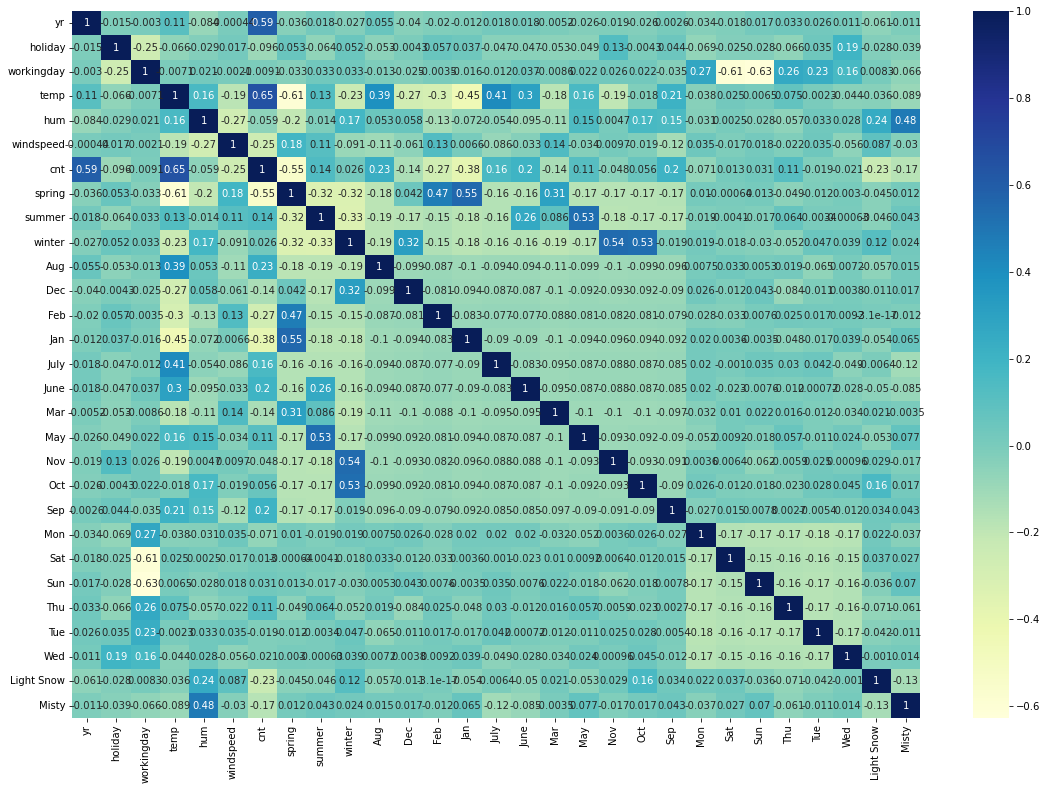

In [30]:
#Plot a heatmap to understand the coorelation of variables in the Train Dataset

plt.figure(figsize=[19,13])
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

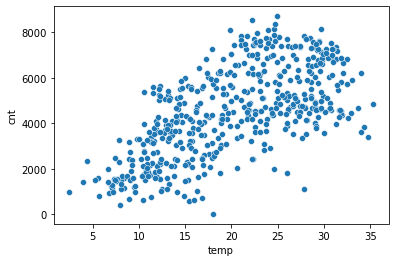

In [31]:
#Visualizing the Temperature variable with the target using a scatter plot as there seems to be a high coorelation

sns.scatterplot(x=df_train.temp , y=df_train.cnt)
plt.show()

### Rescaling the variables

#### MinMaxScaler is used for scaling

In [32]:
scaler = MinMaxScaler()

In [33]:
df_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
576   1        0           1  29.246653  70.4167  11.083475  7216       0   
426   1        0           0  16.980847  62.1250  10.792293  4066       1   
728   1        0           1  10.489153  48.3333  23.500518  1796       1   
482   1        0           0  15.443347  48.9583   8.708325  4220       0   
111   0        0           0  13.803347  72.9583  14.707907  1683       0   

     summer  winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  \
576       0       0    0    0    0    0     1     0    0    0    0    0    0   
426       0       0    0    0    0    0     0     0    1    0    0    0    0   
728       0       0    0    1    0    0     0     0    0    0    0    0    0   
482       1       0    0    0    0    0     0     0    0    0    0    0    0   
111       1       0    0    0    0    0     0     0    0    0    0    0    0   

     Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  Misty  
576    0    0    0    0    0    1           0      0  
426    0    0    1    0    0    0           0      1  
728    1    0    0    0    0    0           0      0  
482    0    0    1    0    0    0           0      1  
111    0    0    1    0    0    0           0      1

In [34]:
#Group the columns which are to be scaled 

rescale_var = ['temp','hum','windspeed','cnt']

In [35]:
#Apply the scaling

df_train[rescale_var] = scaler.fit_transform(df_train[rescale_var])

In [36]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   
111   0        0           0  0.345824  0.751824   0.380981  0.191095       0   

     summer  winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  \
576       0       0    0    0    0    0     1     0    0    0    0    0    0   
426       0       0    0    0    0    0     0     0    1    0    0    0    0   
728       0       0    0    1    0    0     0     0    0    0    0    0    0   
482       1       0    0    0    0    0     0     0    0    0    0    0    0   
111       1       0    0    0    0    0     0     0    0    0    0    0    0   

     Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  Misty  
576    0    0    0    0    0    1           0      0  
426    0    0    1    0    0    0           0      1  
728    1    0    0    0    0    0           0      0  
482    0    0    1    0    0    0           0      1  
111    0    0    1    0    0    0           0      1

## Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5 :  Building a linear model

### Model 1 : 

#### Using the statsmodel to build a linear model

In [38]:
# Add a constant 

X_train_lm = sm.add_constant(X_train['temp'])

In [39]:
# Fit the model

lr = sm.OLS(y_train,X_train_lm).fit()

In [40]:
# Check the parameters 
lr.params

const    0.169031
temp     0.640944
dtype: float64

In [41]:
# Check the summary of the model 

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           2.46e-61
Time:                        21:17:38   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

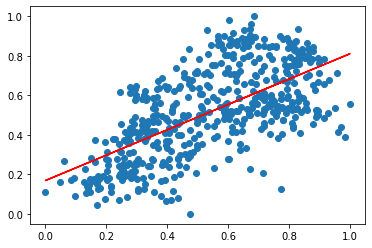

In [42]:
#Visualise the data with a fitted reg line in a scatter plot

plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1],0.1690+0.6409*X_train_lm.iloc[:,1],'r')
plt.show()

### Model 2 :

In [43]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset

X_train_lm = sm.add_constant(X_train)

In [44]:
# Fit the model

lrm2 = sm.OLS(y_train,X_train_lm).fit()

In [45]:
#Check the summary

lrm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.34e-178
Time:                        21:17:39   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3912      0.085      4.594      0.000       0.224       0.558
yr             0.2311      0.008     28.384      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp           0.4405      0.047      9.412      0.000       0.349       0.532
hum           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
spring        -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer         0.0464      0.026      1.761      0.079      -0.005       0.098
winter         0.1126      0.028      3.994      0.000       0.057       0.168
Aug            0.0273      0.034      0.806      0.421      -0.039       0.094
Dec           -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb           -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan           -0.0642      0.034     -1.894      0.059      -0.131       0.002
July          -0.0285      0.035     -0.808      0.420      -0.098       0.041
June           0.0084      0.025      0.336      0.737      -0.041       0.058
Mar            0.0008      0.025      0.032      0.974      -0.048       0.050
May            0.0247      0.021      1.164      0.245      -0.017       0.066
Nov           -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct            0.0056      0.036      0.156      0.876      -0.066       0.077
Sep            0.0908      0.032      2.822      0.005       0.028       0.154
Mon           -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat           -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun           -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu            0.0042      0.015      0.282      0.778      -0.025       0.034
Tue           -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed           -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light Snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Misty         -0.0578      0.011     -5.495      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### Checking the VIF

In [46]:
#Importing the required statsmodel library to calculate the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  63.89
3         temp  43.77
4          hum  41.18
6       spring  13.50
8       winter  12.40
22         Sun  12.34
21         Sat  11.83
7       summer   9.85
17         Nov   7.16
18         Oct   6.82
9          Aug   6.79
12         Jan   6.09
13        July   5.91
10         Dec   5.78
5    windspeed   5.59
19         Sep   5.02
11         Feb   4.50
15         Mar   3.72
14        June   3.04
1      holiday   2.81
27       Misty   2.43
16         May   2.43
0           yr   2.14
20         Mon   2.09
24         Tue   2.09
23         Thu   2.04
25         Wed   1.97
26  Light Snow   1.33

### Selecting the variable using RFE (Recursive feature elimination)

In [48]:
#Import the library to perform RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
#Executing the RFE with required output variables as 18

lm = LinearRegression()

lm.fit(X_train,y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Misty', True, 1)]

In [51]:
rfe_vars = X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Misty'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

### Model 3 :

In [52]:
#Creating a train dataset using RFE variables

X_train_rfe = X_train[rfe_vars]

In [53]:
#Adding a constant to the X_train_rfe variables 

X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
# Fit the model

lrm3 = sm.OLS(y_train,X_train_rfe).fit()

In [55]:
lrm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        21:17:39   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep            0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF for model 3:

In [56]:
# We can drop the constant variable

X_train_rfe = X_train_rfe.drop('const',axis=1)


In [57]:
X_train_rfe.head()

yr  holiday      temp       hum  windspeed  spring  summer  winter  Dec  \
576   1        0  0.815169  0.725633   0.264686       0       0       0    0   
426   1        0  0.442393  0.640189   0.255342       1       0       0    0   
728   1        0  0.245101  0.498067   0.663106       1       0       0    1   
482   1        0  0.395666  0.504508   0.188475       0       1       0    0   
111   0        0  0.345824  0.751824   0.380981       0       1       0    0   

     Jan  July  Nov  Sep  Light Snow  Misty  
576    0     1    0    0           0      0  
426    0     0    0    0           0      1  
728    0     0    0    0           0      0  
482    0     0    0    0           0      1  
111    0     0    0    0           0      1

In [58]:
#Calculate the VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
3          hum  30.89
2         temp  17.79
4    windspeed   4.72
5       spring   4.37
7       winter   4.06
6       summer   2.82
14       Misty   2.32
0           yr   2.09
11         Nov   1.85
9          Jan   1.75
10        July   1.59
8          Dec   1.56
12         Sep   1.41
13  Light Snow   1.28
1      holiday   1.06

## Model 4:

In [59]:
# Build the model after dropping Nov which has the highest p-value

X_train_rfe.drop(columns='Nov',inplace=True)

In [60]:
X_train_rfe  = sm.add_constant(X_train_rfe)

In [61]:
lrm4 = sm.OLS(y_train,X_train_rfe).fit()

In [62]:
lrm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.71e-189
Time:                        21:17:39   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3036      0.035      8.590      0.000       0.234       0.373
yr             0.2302      0.008     28.372      0.000       0.214       0.246
holiday       -0.0974      0.026     -3.817      0.000      -0.147      -0.047
temp           0.5007      0.036     13.930      0.000       0.430       0.571
hum           -0.1630      0.038     -4.298      0.000      -0.237      -0.088
windspeed     -0.1897      0.026     -7.332      0.000      -0.241      -0.139
spring        -0.0533      0.021     -2.542      0.011      -0.095      -0.012
summer         0.0477      0.015      3.150      0.002       0.018       0.078
winter         0.0927      0.018      5.295      0.000       0.058       0.127
Dec           -0.0212      0.016     -1.313      0.190      -0.053       0.011
Jan           -0.0386      0.018     -2.139      0.033      -0.074      -0.003
July          -0.0551      0.018     -3.012      0.003      -0.091      -0.019
Sep            0.0809      0.017      4.828      0.000       0.048       0.114
Light Snow    -0.2424      0.026     -9.173      0.000      -0.294      -0.190
Misty         -0.0534      0.010     -5.099      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       61.182   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.241
Skew:                          -0.645   Prob(JB):                     3.52e-31
Kurtosis:                       5.221   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF for model 4

In [63]:

X_train_rfe = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
3          hum  30.34
2         temp  17.38
4    windspeed   4.66
5       spring   4.35
7       winter   3.43
6       summer   2.80
13       Misty   2.31
0           yr   2.09
9          Jan   1.73
10        July   1.59
11         Sep   1.39
8          Dec   1.35
12  Light Snow   1.26
1      holiday   1.04

## Model 5 :

In [64]:
# Build the model after dropping Dec which has the highest p-value

X_train_rfe.drop(columns='Dec',inplace=True)
X_train_rfe  = sm.add_constant(X_train_rfe)
lrm5 = sm.OLS(y_train,X_train_rfe).fit()
lrm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          7.59e-190
Time:                        21:17:39   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.035      8.483      0.000       0.228       0.365
yr             0.2301      0.008     28.339      0.000       0.214       0.246
holiday       -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp           0.5124      0.035     14.706      0.000       0.444       0.581
hum           -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed     -0.1874      0.026     -7.253      0.000      -0.238      -0.137
spring        -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer         0.0502      0.015      3.336      0.001       0.021       0.080
winter         0.0919      0.018      5.247      0.000       0.057       0.126
Jan           -0.0333      0.018     -1.892      0.059      -0.068       0.001
July          -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep            0.0827      0.017      4.951      0.000       0.050       0.116
Light Snow    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Misty         -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF for model 5 : 

In [65]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
3          hum  29.02
2         temp  16.71
4    windspeed   4.66
5       spring   4.34
7       winter   3.36
6       summer   2.79
12       Misty   2.29
0           yr   2.09
8          Jan   1.67
9         July   1.59
10         Sep   1.38
11  Light Snow   1.24
1      holiday   1.04

## Model 6:

In [66]:
# Build the model after dropping Jan which has the highest p-value

X_train_rfe.drop(columns='Jan',inplace=True)
X_train_rfe  = sm.add_constant(X_train_rfe)
lrm6 = sm.OLS(y_train,X_train_rfe).fit()
lrm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.95e-190
Time:                        21:17:39   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.000       0.217       0.353
yr             0.2294      0.008     28.208      0.000       0.213       0.245
holiday       -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp           0.5299      0.034     15.728      0.000       0.464       0.596
hum           -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed     -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring        -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer         0.0531      0.015      3.536      0.000       0.024       0.083
winter         0.0976      0.017      5.643      0.000       0.064       0.132
July          -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep            0.0833      0.017      4.973      0.000       0.050       0.116
Light Snow    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Misty         -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF for model 6:

In [67]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
3          hum  28.03
2         temp  16.03
4    windspeed   4.65
5       spring   4.01
7       winter   3.33
6       summer   2.79
11       Misty   2.28
0           yr   2.08
8         July   1.58
9          Sep   1.38
10  Light Snow   1.24
1      holiday   1.04

## Model 7 : 

In [68]:
# Build the model after dropping Hum which has the highest VIF


X_train_rfe.drop(columns='hum',inplace=True)
X_train_rfe  = sm.add_constant(X_train_rfe)
lrm7 = sm.OLS(y_train,X_train_rfe).fit()
lrm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          5.06e-187
Time:                        21:17:39   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
yr             0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
July          -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep            0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF for model 7:

In [69]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
2         temp  5.09
3    windspeed  4.60
5       summer  2.23
4       spring  2.08
0           yr  2.07
6       winter  1.78
7         July  1.58
10       Misty  1.55
8          Sep  1.34
9   Light Snow  1.08
1      holiday  1.04

## Model 8:

In [70]:
# Since the VIF is not less than 5 for all the variables, dropping July and recalculating the model

X_train_rfe.drop(columns='July',inplace=True)
X_train_rfe  = sm.add_constant(X_train_rfe)
lrm8 = sm.OLS(y_train,X_train_rfe).fit()
lrm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.47e-186
Time:                        21:17:39   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.000       0.133       0.249
yr             0.2341      0.008     28.237      0.000       0.218       0.250
holiday       -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp           0.4777      0.033     14.423      0.000       0.413       0.543
windspeed     -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring        -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer         0.0621      0.014      4.350      0.000       0.034       0.090
winter         0.0945      0.017      5.630      0.000       0.062       0.127
Sep            0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty         -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF for model 8 :

In [71]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
3   windspeed  4.60
2        temp  3.84
0          yr  2.07
4      spring  1.99
5      summer  1.90
6      winter  1.63
9       Misty  1.55
7         Sep  1.23
8  Light Snow  1.08
1     holiday  1.04

### So we have observed that our model has a R-Square value of 0.83 and all the variables have a VIF below 5 which is desired

### Columns used to build the model

In [72]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Sep', 'Light Snow', 'Misty'],
      dtype='object')

## Step 6 : Residual Analysis of the train data

In [73]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
y_train_pred = lrm8.predict(X_train_rfe)

res = y_train - y_train_pred

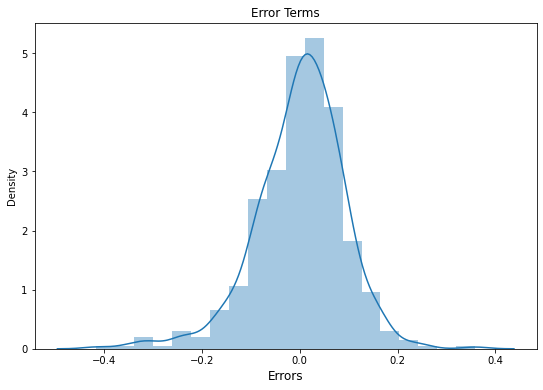

In [75]:
# Plot the histogram of the error terms

plt.figure(figsize=(9,6))
sns.distplot(res,bins=20)
plt.title("Error Terms")
plt.xlabel('Errors', fontsize = 12) 
plt.show()

#### The histogram shows that the residuals are distributed Normally

## Step 7 : Making Predictions Using the Final Model

### Apply scaling on Test Variables

In [76]:
scaler = MinMaxScaler()

In [77]:
rescale_var

['temp', 'hum', 'windspeed', 'cnt']

In [78]:
df_test[rescale_var] = scaler.fit_transform(df_test[rescale_var])

In [79]:
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
184   0        1           0  0.837241  0.534223   0.149393  0.704300       0   
535   1        0           1  0.911423  0.470417   0.231142  0.725421       0   
299   0        0           0  0.496221  0.777843   0.443398  0.278853       0   
221   0        0           1  0.890387  0.236659   0.449707  0.545512       0   
152   0        0           0  0.821739  0.070765   0.682387  0.569148       0   

     summer  winter  Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  \
184       0       0    0    0    0    0     1     0    0    0    0    0    0   
535       1       0    0    0    0    0     0     1    0    0    0    0    0   
299       0       1    0    0    0    0     0     0    0    0    0    1    0   
221       0       0    1    0    0    0     0     0    0    0    0    0    0   
152       1       0    0    0    0    0     0     1    0    0    0    0    0   

     Mon  Sat  Sun  Thu  Tue  Wed  Light Snow  Misty  
184    0    0    0    0    0    1           0      1  
535    0    0    0    1    0    0           0      0  
299    0    1    0    0    0    0           0      1  
221    0    0    0    0    0    0           0      0  
152    0    1    0    0    0    0           0      0

#### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
X_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.546074    0.508362    0.418803   
std      0.500809    0.187620    0.480828    0.248645    0.200875    0.187683   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.329310    0.361079    0.284201   
50%      0.000000    0.000000    1.000000    0.545492    0.491299    0.403318   
75%      1.000000    0.000000    1.000000    0.756414    0.650989    0.523975   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter         Aug         Dec         Feb  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.254545    0.263636    0.236364    0.059091    0.086364    0.100000   
std      0.436599    0.441609    0.425817    0.236333    0.281541    0.300684   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Jan        July        June         Mar         May         Nov  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.077273    0.104545    0.095455    0.054545    0.086364    0.072727   
std      0.267633    0.306665    0.294512    0.227609    0.281541    0.260281   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Oct         Sep         Mon         Sat         Sun         Thu  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.086364    0.118182    0.172727    0.154545    0.140909   
std      0.281541    0.281541    0.323559    0.378873    0.362295    0.348721   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Tue         Wed  Light Snow       Misty  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.122727    0.159091    0.027273    0.318182  
std      0.328872    0.366595    0.163248    0.466833  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000

In [82]:
X_train_rfe.drop(columns='const',inplace=True)

In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]

In [84]:
# Adding a constant

X_test_new = sm.add_constant(X_test_new)

In [85]:
y_test_pred = lrm8.predict(X_test_new)

### Finding the relationship between the Target Variable and Feature Variables

<Figure size 1080x720 with 0 Axes>

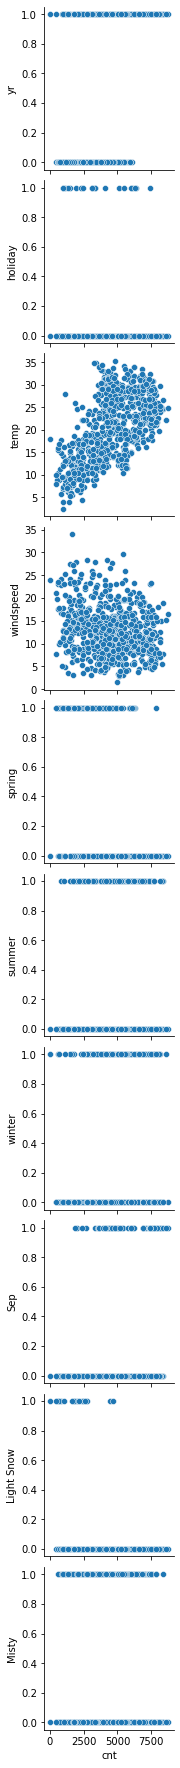

In [86]:
# Pair Plot for numerical variables

plt.figure(figsize=[15,10])
sns.pairplot(bikes_df,y_vars=X_train_rfe.columns,x_vars='cnt')
plt.show()

## Step 8 : Model Evaluation



### Prediction on the Test Data set

In [87]:
from sklearn.metrics import r2_score

In [88]:
# Find the R2 score for both the Train and Test Dataset

r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.8327073211549113

In [89]:
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.7934980961455608

#### Let's now plot the graph for actual versus predicted values

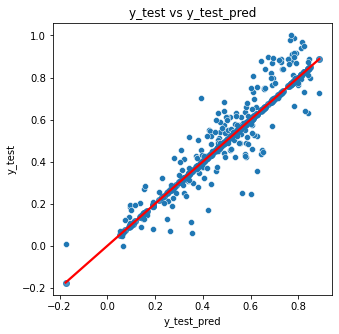

In [90]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=[5,5])
sns.scatterplot(y=y_test,x=y_test_pred)
sns.regplot(x=y_test_pred,y=y_test_pred,fit_reg=True,ci=60,line_kws={"color": "red"})
plt.xlabel('y_test_pred')
plt.ylabel('y_test')
plt.title('y_test vs y_test_pred')
plt.show()

### The equation of our best fitted line is:

cnt = 0.2341xyr - 0.0963xHoliday + 0.4777xTemp - 0.1481xWindspeed - 0.0554xSpring +0.0621xSummer + 0.0945xWinter + 0.0910xSep - 0.2850xLight Snow - 0.0787xMisty

In [91]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_test,y_pred=y_test_pred))
print(mean_squared_error(y_true=y_train,y_pred=y_train_pred))

0.011790980957365402
0.008409128123522073


#### The Mean Squared Error for both the Train and Test Data is almost equal to 0, which implies that the model is accurately predicting all the variances in the dataset

## Summary : 

The model is having a R- Square value of 83.2% on the Train Data and 79.3% on the Test Data

Based on the predicted model we can conclude that the bike demands of BoomBikes is dependent on the temperature and also the season like there is high demand of bikes in Winter when compared to Summer or Spring. Also to focus on the months, Sep seems to see higher demands in rentals. The demand is also impacted in weather conditions like when its Misty or there is a slight snow